In [1]:
your_local_path = "C:/Users/sylve/Downloads/Machine learning/Dataset/Project datasets modified/prudential insurance/"

In [2]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
train_set=pd.read_csv(your_local_path+'attachment_train.csv')

In [4]:
pd.options.display.max_columns=4000
pd.options.display.max_rows=4000

In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


In [6]:
train_set.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59362.000000,59381.000000,59381.000000,52602.000000,59381.000000,48527.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,33985.000000,59381.000000,59381.000000,59381.000000,59381.000000,30725.000000,25140.000000,40197.000000,17570.000000,50492.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,557.000000,59381.000000,59381.000000,59381.000000,59381.000000,14785.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,3801.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,1107.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,0.469462,0.077582

In [7]:
for i in train_set.columns:
    if((train_set[i].isnull().sum()!=0)&(train_set[i].isnull().sum()>(59381*0.50))):
        print(i,train_set[i].isnull().sum())
        print("mode",train_set[i].mode()[0])
        print("mean",train_set[i].mean())
        train_set=train_set.drop([i],axis=1)
        

Family_Hist_3 34241
mode 0.519607843
mean 0.4977373765798313
Family_Hist_5 41811
mode 0.535714286
mean 0.48463492966551047
Medical_History_10 58824
mode 240.0
mean 141.1184919210054
Medical_History_15 44596
mode 240.0
mean 123.76097396009469
Medical_History_24 55580
mode 0.0
mean 50.63562220468298
Medical_History_32 58274
mode 0.0
mean 11.965672990063235


In [8]:
len(train_set.columns)

122

In [9]:
train_set=train_set.drop(['Id'],axis=1)

In [10]:
for i in train_set.columns:
    if(train_set[i].isnull().sum()!=0):
        print(i,train_set[i].isnull().sum())
        print("mode",train_set[i].mode()[0])
        print()
        train_set[i].fillna(train_set[i].mode()[0],inplace=True)

Employment_Info_1 19
mode 0.0

Employment_Info_4 6779
mode 0.0

Employment_Info_6 10854
mode 1.0

Insurance_History_5 25396
mode 0.000666667

Family_Hist_2 28656
mode 0.434782609

Family_Hist_4 19184
mode 0.408450704

Medical_History_1 8889
mode 1.0



In [11]:
for i in train_set.columns:
    if(train_set[i].dtype==object):
        print(i)

Product_Info_2


In [12]:
train_set["Product_Info_2"].value_counts()

D3    14321
D4    10812
A8     6835
D1     6554
D2     6286
E1     2647
A1     2363
A6     2098
A2     1974
A7     1383
B2     1122
A3      977
A5      775
C3      306
C1      285
C4      219
A4      210
C2      160
B1       54
Name: Product_Info_2, dtype: int64

In [13]:
labels=train_set["Product_Info_2"].astype('category').cat.categories.tolist()

In [14]:
replace_map={'Product_Info_2':{k:v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
print(replace_map)

{'Product_Info_2': {'A1': 1, 'A2': 2, 'A3': 3, 'A4': 4, 'A5': 5, 'A6': 6, 'A7': 7, 'A8': 8, 'B1': 9, 'B2': 10, 'C1': 11, 'C2': 12, 'C3': 13, 'C4': 14, 'D1': 15, 'D2': 16, 'D3': 17, 'D4': 18, 'E1': 19}}


In [15]:
train_set.replace(replace_map,inplace=True)

In [16]:
train_set["Product_Info_2"]=train_set["Product_Info_2"].astype('int64')

In [17]:
corr=train_set.corr()

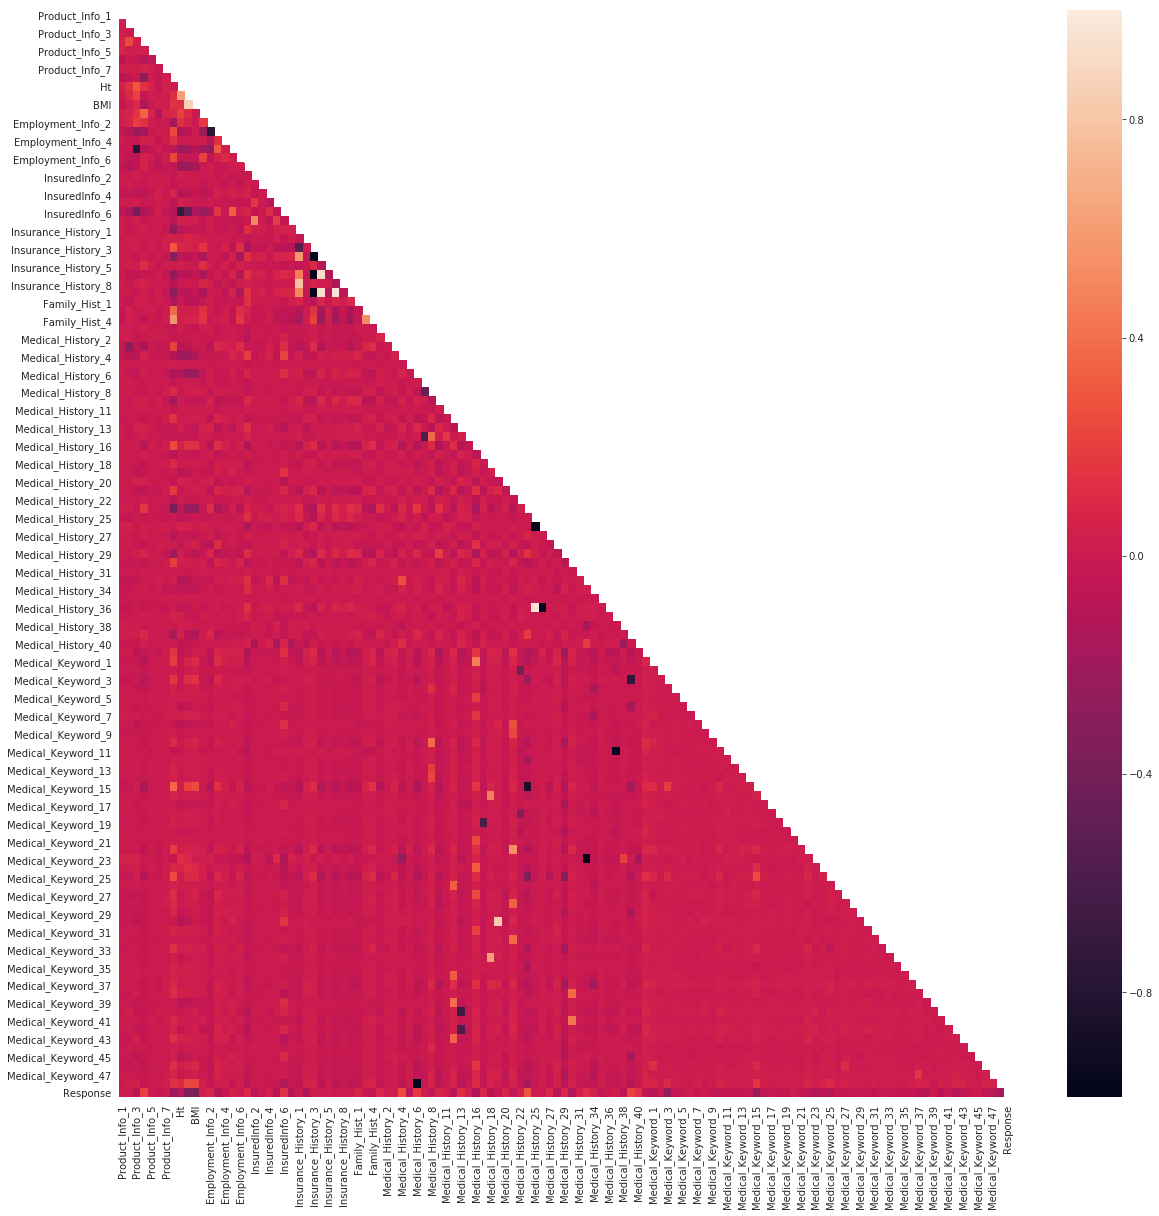

In [18]:
#heatmap show the correlationship between each of the variable
plt.figure(figsize=(20,20))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
     ax = sns.heatmap(corr, mask=mask)  
plt.show()        

In [19]:
y=train_set.pop("Response")

In [20]:
X_train,X_test,y_train,y_test = train_test_split(train_set,y,test_size=0.20,random_state=123)

In [21]:
sklearn_lda = LinearDiscriminantAnalysis()
transf_lda1 = sklearn_lda.fit_transform(X_train,y_train)
model = sklearn_lda.fit(X_train,y_train)

In [22]:
model.explained_variance_ratio_

array([0.6590433 , 0.12806394, 0.10083444, 0.06597199, 0.02378608,
       0.01755437, 0.00474588])

In [23]:
sprd=model.predict(X_test)

In [27]:
print(accuracy_score(y_test,sprd))
print(confusion_matrix(y_test,sprd))

0.47293087480003365
[[ 335  201   21    5  105  210   97  268]
 [ 200  279   11    4  214  249   94  290]
 [  18   11    7    5   23  118    3   22]
 [  12    7    5   15    0  140    9   97]
 [  78  120    6    3  318  228   79  238]
 [ 140  154   11   24  147  863  213  643]
 [  56   26    2    7   42  310  386  752]
 [  42   15    6   14   11  384   70 3414]]


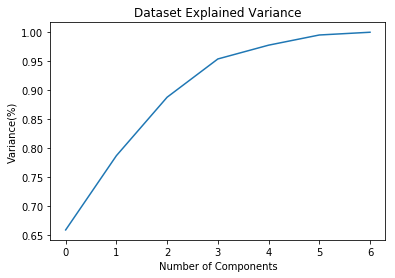

In [28]:
plt.figure()
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance(%)') #for each Component
plt.title('Dataset Explained Variance')
plt.show()

In [29]:
transf_lda1.shape

(47504, 7)

In [34]:
transf_lda_train = sklearn_lda.fit_transform(X_train,y_train)
transf_lda_test = sklearn_lda.fit_transform(X_test,y_test)

In [35]:
modelx = sklearn_lda.fit(transf_lda_train,y_train)

In [36]:
prd1 = modelx.predict(transf_lda_test)
print(accuracy_score(y_test,prd1))
print(confusion_matrix(y_test,prd1))

0.4863180937947293
[[ 369  198    4    4   98  221   84  264]
 [ 199  301    8    3  214  241   90  285]
 [  17   12    9    2   21  118    2   26]
 [  13    4    2   26    1  125    5  109]
 [  79  104    6    5  342  239   64  231]
 [ 139  162    5   11  125  888  202  663]
 [  50   29    1    7   25  319  391  759]
 [  48   21    3   12    8  338   76 3450]]


In [37]:
# Applying Random Forest to the reduced dimension dataset

from sklearn.ensemble import RandomForestClassifier

# building and fitting my_forest
forest = RandomForestClassifier(max_depth=25,min_samples_split=2,n_estimators=100,random_state=1)
my_forest = forest.fit(transf_lda_train,y_train)

In [38]:
train_pred = my_forest.predict(transf_lda_test)
train_pred

array([8, 5, 8, ..., 8, 8, 2], dtype=int64)

In [40]:
train_conf = confusion_matrix(y_test, train_pred)
train_conf

array([[ 380,  211,    2,    2,   68,  251,   87,  241],
       [ 220,  359,    4,    5,  132,  289,   89,  243],
       [  30,    7,    4,    4,   42,   86,    7,   27],
       [  20,    6,    2,   30,    3,  104,   13,  107],
       [  95,  128,    2,    2,  335,  270,   72,  166],
       [ 148,  148,    5,   26,  147,  926,  242,  553],
       [  54,   44,    1,    8,   34,  388,  445,  607],
       [  53,   29,    1,   17,   10,  340,  179, 3327]], dtype=int64)

In [42]:
accuracy_score(y_test,train_pred)

0.488843984171087